In [61]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import sys



## Problem 1.1

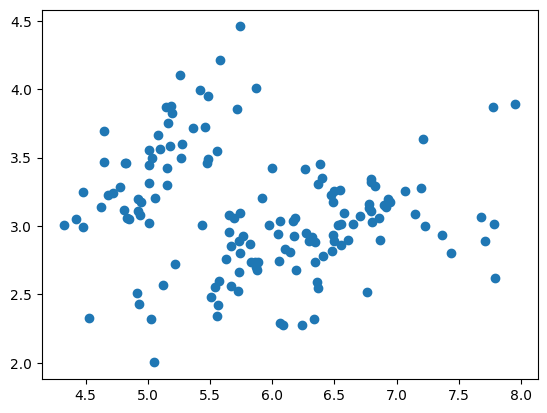

In [62]:
iris=np.genfromtxt("data/iris.txt",delimiter=None)
X,Y=iris[:,0:2], iris[:,-1]

plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.show()

The figure shows approximately 4 clusters
## Problem 1.2  

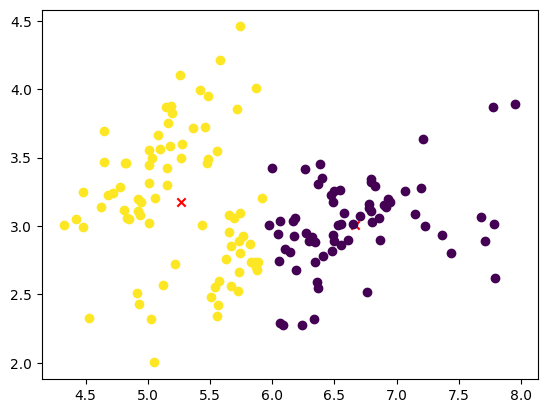

In [63]:
k=2
sumd_best = sys.maxsize
for i in range(10):
    z, c, sumd = ml.cluster.kmeans(X, k)
    if sumd < sumd_best:
        sumd_best = sumd
        z_best = z
        c_best = c
        sumdbest = sumd
ml.plotClassify2D(None, X, z_best)
plt.scatter(c[:,0],c[:,1],c='r',marker='x')


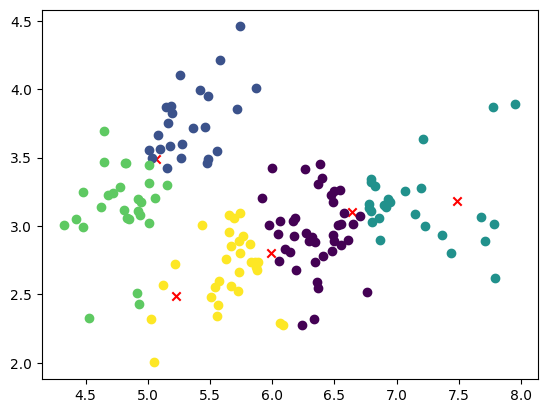

In [64]:
k=5
sumd_best = sys.maxsize
for i in range(10):
    z, c, sumd = ml.cluster.kmeans(X, k)
    if sumd < sumd_best:
        sumd_best = sumd
        z_best = z
        c_best = c
        sumdbest = sumd
ml.plotClassify2D(None, X, z_best)
plt.scatter(c[:,0],c[:,1],c='r',marker='x')


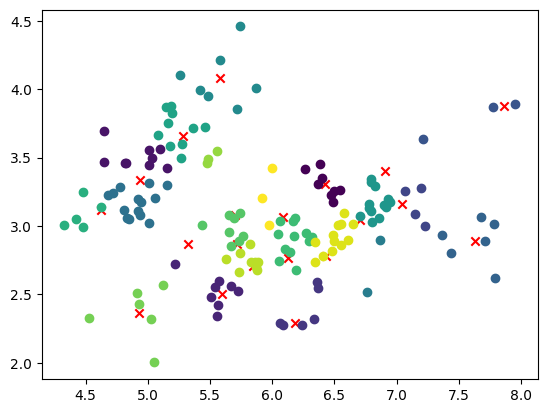

In [65]:
k=20
sumd_best = sys.maxsize
for i in range(15):
    z, c, sumd = ml.cluster.kmeans(X, k)
    if sumd < sumd_best:
        sumd_best = sumd
        z_best = z
        c_best = c
        sumdbest = sumd
ml.plotClassify2D(None, X, z_best)
plt.scatter(c[:,0],c[:,1],c='r',marker='x')


## Problem 1.3  

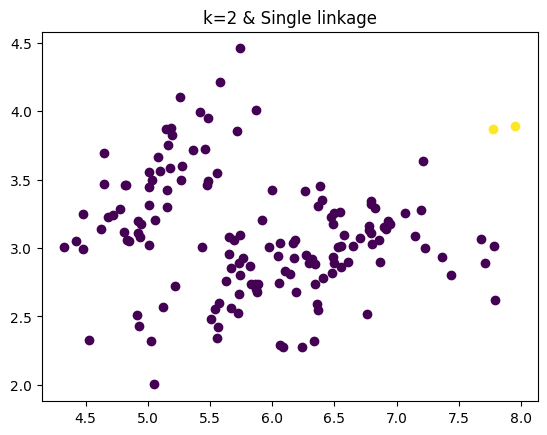

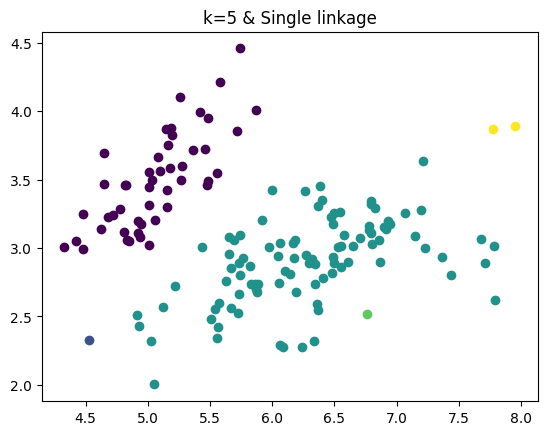

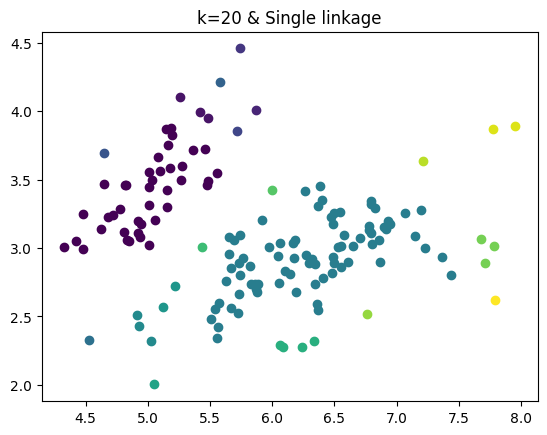

In [66]:
k_arr = [2,5, 20]
for k in k_arr:
    z, _ = ml.cluster.agglomerative(X, k, method="min")
    ml.plotClassify2D(None, X, z)
    plt.title('k={} & Single linkage'.format(k))
    plt.show()

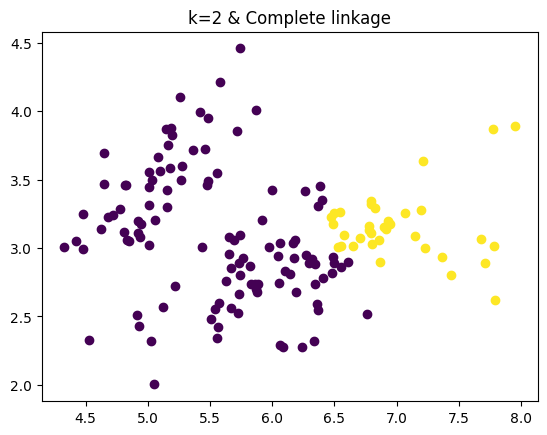

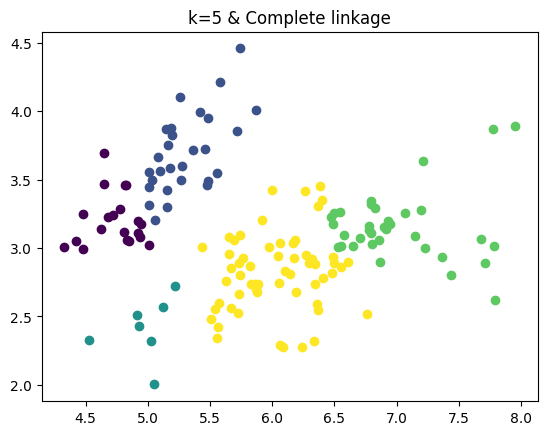

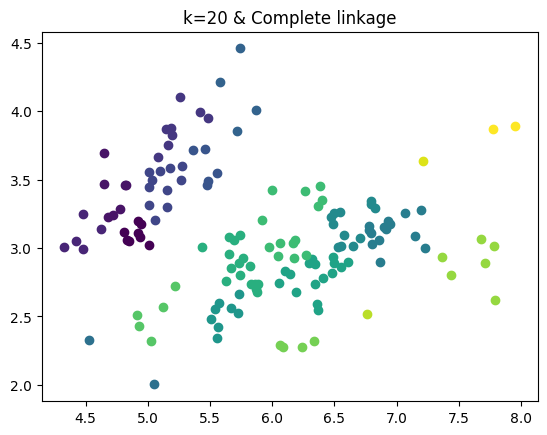

In [67]:
for k in k_arr:
    z, _ = ml.cluster.agglomerative(X, k, method="max")
    ml.plotClassify2D(None, X, z)
    plt.title('k={} & Complete linkage'.format(k))
    plt.show()

## Problem 1.4  
Similarities:  
1. They aim to partition the data into clusters 

Differences:
1. In k-means, the number of clusters needs to be specified in advance, but agglomerative doesn't.
2. k-means is sensitive to the initialization, but agglomerative doesn't.

## Problem 2.1

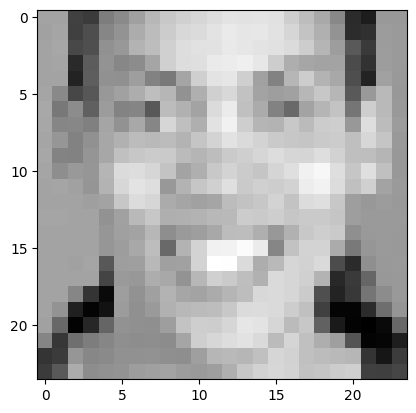

In [68]:
X = np.genfromtxt("data/faces.txt", delimiter=None) # load face dataset
plt.figure()
# pick a data point i for display
img = np.reshape(X[i,:],(24,24)) # convert vectorized data to 24x24 image patches 
plt.imshow( img.T , cmap="gray") # display image patch; you may have to squint

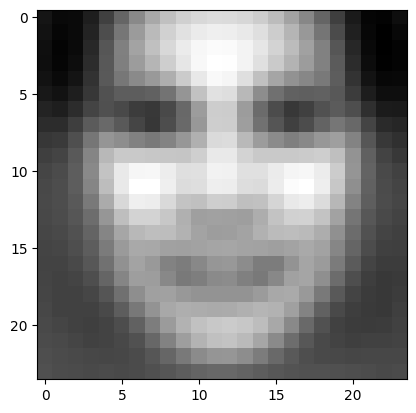

In [69]:
mu=X.mean(axis=0,keepdims=True)
X0=X-mu
plt.figure()
mean_face=np.reshape(mu,(24,24))
plt.imshow(mean_face.T,cmap="gray")

## Problem 2.2

In [70]:
import scipy.linalg
U,S,V=scipy.linalg.svd(X0,full_matrices=False)
W=U.dot(np.diag(S))
print(W.shape,V.shape)


(4916, 576) (576, 576)


## Problem 2.3  

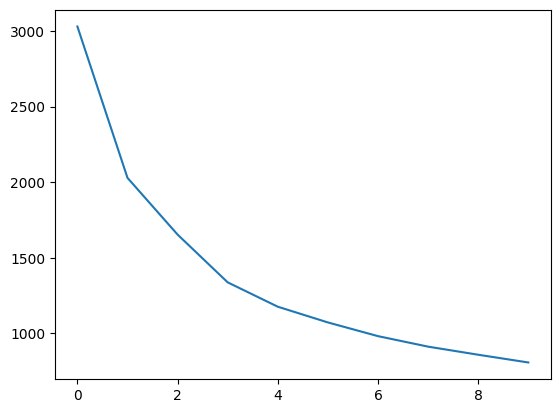

In [71]:
mse_array=[None]*10
for i in range(10):
    X0_hat=W[:,:i].dot(V[:i,:])
    mse_array[i]=((X0-X0_hat)**2).mean()
plt.plot(mse_array)

## Problem 2.4

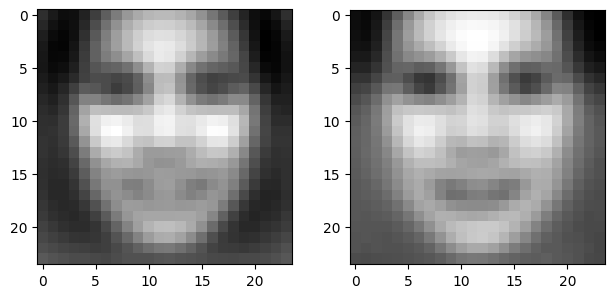

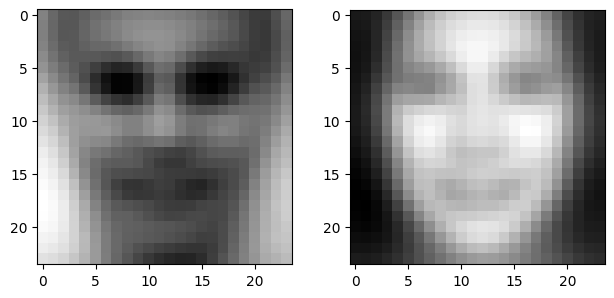

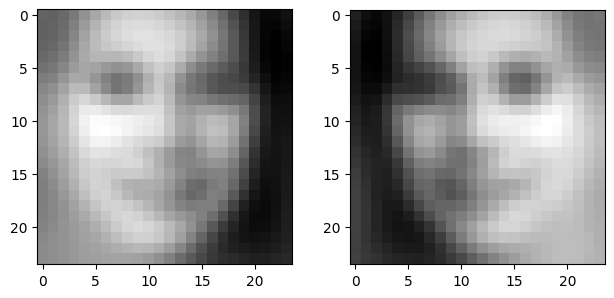

In [72]:
for i in range(3):
    alpha = 2 * np.mean(np.abs(W[:, i]))
    vector1 = mu + alpha * V[i, :]
    vector2 = mu - alpha * V[i, :]
    
    img1 = np.reshape(vector1, (24, 24))
    img2 = np.reshape(vector2, (24, 24))

    fig, axs = plt.subplots(1, 2)
    plt.tight_layout()
    axs[0].imshow(img1.T, cmap='gray')
    axs[1].imshow(img2.T, cmap='gray')
    plt.show()

## Problem 2.5

<Figure size 640x480 with 0 Axes>

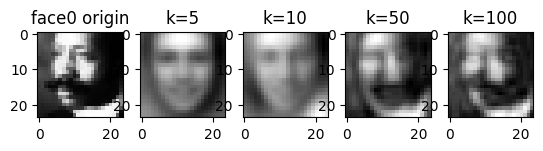

<Figure size 640x480 with 0 Axes>

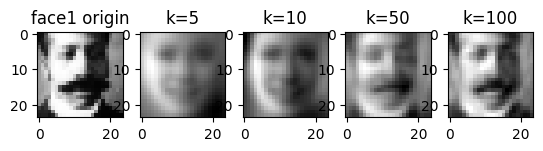

In [73]:
for i in range(2):
    origin_img = np.reshape(X[i,:], (24, 24))
    plt.figure()
    fig,axs=plt.subplots(1,5)
    axs[0].imshow(origin_img.T,cmap="gray")
    axs[0].set_title(f"face{i} origin")
    index=1
    for k in [5,10,50,100]:
        img=mu + W[i, :k].dot(V[:k, :])
        img=np.reshape(img,(24,24))
        axs[index].imshow(img.T,cmap="gray")
        axs[index].set_title(f'k={k}')
        index +=1
plt.show()

## Problem 2.6

[1472, 4894, 2326, 4209, 1263, 1621, 2884, 1811, 996, 3309, 3708, 2007, 4332, 702, 1909, 3788, 213, 2958, 653, 225, 4045, 362, 1366, 1431, 143]


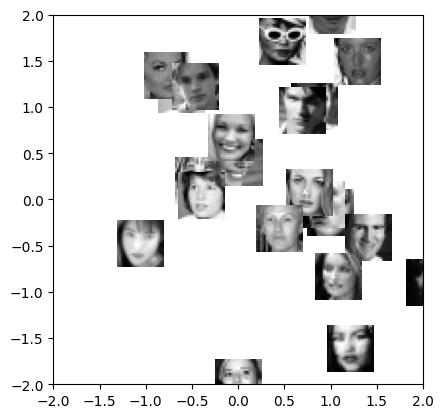

In [74]:
import random
import mltools.transforms

idx = random.sample(range(W.shape[0]), 25)
print(idx)

coord,params = ml.transforms.rescale( W[:,0:2] ) # normalize scale of "W" locations 
plt.figure(); 
for i in idx:
# compute where to place image (scaled W values) & size
    loc = (coord[i,0],coord[i,0]+0.5, coord[i,1],coord[i,1]+0.5)
    img = np.reshape( X[i,:], (24,24) ) # reshape to square
    plt.imshow( img.T , cmap="gray", extent=loc ) # draw each image
    plt.axis( (-2,2,-2,2) ) # set axis to a reasonable scale

## Statement of Collaboration 
I do it by myself